## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
flights = pd.read_csv('data/flights_10000.csv', index_col=0)
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,773.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,1960.0,0.0,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [4]:
#load test data (these are the cols we will have at the test phase)
fl_test = pd.read_csv('data/flights_test_10.csv')
fl_test.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,1577836800000,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,1577836800000,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,1577836800000,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,1577836800000,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,1577836800000,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333


In [5]:
pd.Timestamp.fromtimestamp(1577836800000/1000)

Timestamp('2020-01-01 00:00:00')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [5]:
import datetime as dt

In [54]:
fl_test['fl_date'] = fl_test['fl_date']/1000
fl_test['fl_date'] = fl_test['fl_date'].apply(pd.Timestamp.fromtimestamp)

In [56]:
fl_test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
5,2020-01-01,WN,WN,WN,5684,WN,N7856A,5684,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",600,715,N,75,1,333
6,2020-01-01,WN,WN,WN,6152,WN,N7735A,6152,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1620,1740,N,80,1,333
7,2020-01-01,WN,WN,WN,1679,WN,N405WN,1679,13891,ONT,"Ontario, CA",14893,SMF,"Sacramento, CA",1505,1630,N,85,1,390
8,2020-01-01,WN,WN,WN,3479,WN,N489WN,3479,13891,ONT,"Ontario, CA",14893,SMF,"Sacramento, CA",1230,1355,N,85,1,390
9,2020-01-01,WN,WN,WN,4069,WN,N7708E,4069,13891,ONT,"Ontario, CA",14893,SMF,"Sacramento, CA",740,900,N,80,1,390


In [8]:
fl_test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [41]:
weather_df = flights[['fl_date', 'origin_city_name','crs_dep_time', 'dest_city_name', 'crs_arr_time']].head(10)
weather_df

,fl_date,origin_city_name,crs_dep_time,dest_city_name,crs_arr_time
0,2018-07-10,"San Antonio, TX",705,"Nashville, TN",915
1,2019-10-10,"Chicago, IL",800,"Orlando, FL",1148
2,2019-07-18,"Lawton/Fort Sill, OK",1034,"Dallas/Fort Worth, TX",1130
3,2018-11-25,"Savannah, GA",2200,"Chicago, IL",2327
4,2018-10-24,"Detroit, MI",841,"Santa Ana, CA",1039
5,2019-06-08,"Richmond, VA",1149,"Dallas/Fort Worth, TX",1400
6,2018-01-29,"Charlotte, NC",1436,"St. Louis, MO",1534
7,2019-08-14,"Allentown/Bethlehem/Easton, PA",1844,"Sanford, FL",2105
8,2019-01-28,"Tucson, AZ",735,"Dallas/Fort Worth, TX",1050
9,2018-03-05,"Charlotte, NC",1759,"Raleigh/Durham, NC",1854


In [10]:
import requests
import time
api_key_weather = os.environ["world_weather_api_key2"]
#world_weather_api_key2 use this one starting oct 25th

In [11]:
def get_weather(city, date, tp = 12):
    """
    PARAMETERS:
    city: q=New+york,ny City Name, State
    date: date=yyyy-MM-dd
    nearest weather station: includelocation=yes
    time: time intervauls, default of api is 3, we have set default for the function to 12 
    Format: format=json (xml is default)
    key: key = api_key_weather
    
    *******The number of results to return, up to 250*******
    """
    
    
    url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    headers = {
        "q": city.replace(" ", ""),         
        "date": date,         
        "format": "json",
        "includelocation":"yes",
        "tp":str(tp),
        "key": api_key_weather,
    }
    response = requests.get(url, params=headers)
    return response.json()

In [12]:
#test function
get_weather("Chicago, IL", "2019-10-10")

{'data': {'request': [{'type': 'City',
    'query': 'Chicago, United States of America'}],
  'nearest_area': [{'areaName': [{'value': 'Chicago'}],
    'country': [{'value': 'United States of America'}],
    'region': [{'value': 'Illinois'}],
    'latitude': '41.850',
    'longitude': '-87.650'}],
  'weather': [{'date': '2019-10-10',
    'astronomy': [{'sunrise': '06:57 AM',
      'sunset': '06:17 PM',
      'moonrise': '05:22 PM',
      'moonset': '03:35 AM',
      'moon_phase': 'Waxing Gibbous',
      'moon_illumination': '76'}],
    'maxtempC': '20',
    'maxtempF': '68',
    'mintempC': '15',
    'mintempF': '60',
    'avgtempC': '18',
    'avgtempF': '64',
    'totalSnow_cm': '0.0',
    'sunHour': '8.7',
    'uvIndex': '5',
    'hourly': [{'time': '0',
      'tempC': '16',
      'tempF': '61',
      'windspeedMiles': '11',
      'windspeedKmph': '17',
      'winddirDegree': '138',
      'winddir16Point': 'SE',
      'weatherCode': '113',
      'weatherIconUrl': [{'value': 'https://

In [13]:
#test function
get_weather("San Antonio, TX", "2018-07-10")['data']['weather'][0]['hourly']   #now we have a list with two dictionaries for each time (0h and 12h)

[{'time': '0',
  'tempC': '25',
  'tempF': '78',
  'windspeedMiles': '6',
  'windspeedKmph': '9',
  'winddirDegree': '177',
  'winddir16Point': 'S',
  'weatherCode': '353',
  'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0025_light_rain_showers_night.png'}],
  'weatherDesc': [{'value': 'Light rain shower'}],
  'precipMM': '2.1',
  'precipInches': '0.1',
  'humidity': '83',
  'visibility': '10',
  'visibilityMiles': '6',
  'pressure': '1020',
  'pressureInches': '30',
  'cloudcover': '41',
  'HeatIndexC': '28',
  'HeatIndexF': '82',
  'DewPointC': '22',
  'DewPointF': '72',
  'WindChillC': '25',
  'WindChillF': '78',
  'WindGustMiles': '8',
  'WindGustKmph': '13',
  'FeelsLikeC': '28',
  'FeelsLikeF': '82',
  'uvIndex': '1'},
 {'time': '1200',
  'tempC': '31',
  'tempF': '87',
  'windspeedMiles': '5',
  'windspeedKmph': '8',
  'winddirDegree': '290',
  'winddir16Point': 'WNW',
  'weatherCode': '356',
  'weatherIconUrl': [{'value': 'htt

In [16]:
get_weather("San Antonio, TX", "2018-07-10")['data']['weather'][0]['hourly'][1]['weatherDesc'][0]['value']

'Moderate or heavy rain shower'

In [17]:
get_weather("Dallas/Fort Worth, TX", "2019-07-18")

{'data': {'request': [{'type': 'City',
    'query': 'Dallas, United States of America'}],
  'nearest_area': [{'areaName': [{'value': 'Dallas'}],
    'country': [{'value': 'United States of America'}],
    'region': [{'value': 'Texas'}],
    'latitude': '32.783',
    'longitude': '-96.800'}],
  'weather': [{'date': '2019-07-18',
    'astronomy': [{'sunrise': '06:31 AM',
      'sunset': '08:35 PM',
      'moonrise': '10:05 PM',
      'moonset': '08:00 AM',
      'moon_phase': 'Full Moon',
      'moon_illumination': '93'}],
    'maxtempC': '36',
    'maxtempF': '96',
    'mintempC': '26',
    'mintempF': '78',
    'avgtempC': '32',
    'avgtempF': '89',
    'totalSnow_cm': '0.0',
    'sunHour': '11.6',
    'uvIndex': '8',
    'hourly': [{'time': '0',
      'tempC': '29',
      'tempF': '84',
      'windspeedMiles': '14',
      'windspeedKmph': '23',
      'winddirDegree': '183',
      'winddir16Point': 'S',
      'weatherCode': '113',
      'weatherIconUrl': [{'value': 'https://cdn.worldw

In [30]:
get_weather(weather_df['dest_city_name'][0], weather_df['fl_date'][0])

{'data': {'request': [{'type': 'City',
    'query': 'Nashville, United States of America'}],
  'nearest_area': [{'areaName': [{'value': 'Nashville'}],
    'country': [{'value': 'United States of America'}],
    'region': [{'value': 'Tennessee'}],
    'latitude': '36.166',
    'longitude': '-86.784'}],
  'weather': [{'date': '2018-07-10',
    'astronomy': [{'sunrise': '05:39 AM',
      'sunset': '08:06 PM',
      'moonrise': '03:15 AM',
      'moonset': '05:39 PM',
      'moon_phase': 'Waning Crescent',
      'moon_illumination': '19'}],
    'maxtempC': '32',
    'maxtempF': '90',
    'mintempC': '23',
    'mintempF': '74',
    'avgtempC': '29',
    'avgtempF': '85',
    'totalSnow_cm': '0.0',
    'sunHour': '14.5',
    'uvIndex': '7',
    'hourly': [{'time': '0',
      'tempC': '24',
      'tempF': '75',
      'windspeedMiles': '2',
      'windspeedKmph': '4',
      'winddirDegree': '285',
      'winddir16Point': 'WNW',
      'weatherCode': '113',
      'weatherIconUrl': [{'value': 'ht

In [18]:
weather_code = pd.read_csv('https://www.worldweatheronline.com/feed/wwoConditionCodes.txt', delimiter='\t', index_col=0)
weather_code.drop(['DayIcon', 'NightIcon'], axis = 1, inplace = True)
weather_code.reset_index(inplace = True)

In [19]:
weather_code.head()

,WeatherCode,Condition
0,395,Moderate or heavy snow in area with thunder
1,392,Patchy light snow in area with thunder
2,389,Moderate or heavy rain in area with thunder
3,386,Patchy light rain in area with thunder
4,377,Moderate or heavy showers of ice pellets


In [47]:
#assign each condition to a broader category

condition_dict = {'cloudy': [119, 122],                                    # cloudy, overcast
                  'sunny': [113, 116],                                     # clear/sunny, partly cloudy
                  'snow_minor' : [179, 182, 227, 323, 326],                # Patchy snow nearby, Patchy sleet nearby, Blowing snow, Patchy light snow, Light snow
                  'snow': [317, 329, 332, 335, 368, 374, 392],             # Light sleet, Patchy moderate snow, Moderate snow, Patchy heavy snow, Light snow showers, Light showers of ice pellets, Patchy light snow in area with thunder
                  'rain_minor': [143, 176, 185, 263, 266, 293, 296, 362],              # mist, Patchy rain nearby, Patchy freezing drizzle nearby, Patchy light drizzle, Light drizzle, Patchy light rain, Light rain, Light sleet showers
                  'rain': [299, 302, 305, 311, 353, 356, 386, 389, 281],                 # Moderate rain at times, Moderate rain, Heavy rain at times, Light freezing rain, Light rain shower, Moderate or heavy rain shower, Patchy light rain in area with thunder, Moderate or heavy rain in area with thunder, Freezing drizzle
                  'harzard': [200, 230, 248, 260, 284, 308, 314, 320, 338, 350, 359, 365, 371, 377, 395]        # Thundery outbreaks in nearby, Blizzard, Fog, Freezing fog, Heavy freezing drizzle, Heavy rain, Moderate or Heavy freezing rain
                 }                                                                                              # Moderate or heavy sleet, Heavy snow, Ice pellets, Torrential rain shower, Moderate or heavy sleet, Moderate or heavy snow showers, Moderate or heavy showers of ice pellets, Moderate or heavy snow in area with thunder

In [44]:
def weather_cols(df, cond_dict, tp = 12):
    """
    Params: 
    df = weather_df
    tp = hour intervals, 12 hrs means 2 sets of weather results, must match the tp from get_weather func
    """
    for index in df.index:
        arrival_json = get_weather(df['origin_city_name'][index], df['fl_date'][index])
        dept_json = get_weather(df['dest_city_name'][index], df['fl_date'][index])
        #check the frequency of repeat city/date combos
        
        df[f'weatherCode_arrival'][index] = int(arrival_json['data']['weather'][0]['hourly'][1]['weatherCode'])
        df[f'weatherCode_dept'][index] = int(dept_json['data']['weather'][0]['hourly'][1]['weatherCode'])
    
    # if code in condition dict return the key:
    
    #first_key = [k for k, v in d.items() if v == 'aaa'][0]

In [45]:
weather_cols(weather_df, condition_dict)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_3116\1104574061.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'weatherCode_arrival'][index] = int(arrival_json['data']['weather'][0]['hourly'][1]['weatherCode'])
C:\Users\3_hal\AppData\Local\Temp\ipykernel_3116\1104574061.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'weatherCode_dept'][index] = int(dept_json['data']['weather'][0]['hourly'][1]['weatherCode'])


In [46]:
weather_df.head()

,fl_date,origin_city_name,crs_dep_time,dest_city_name,crs_arr_time,weatherCode_arrival,weatherCode_dept
0,2018-07-10,"San Antonio, TX",705,"Nashville, TN",915,356,356
1,2019-10-10,"Chicago, IL",800,"Orlando, FL",1148,113,176
2,2019-07-18,"Lawton/Fort Sill, OK",1034,"Dallas/Fort Worth, TX",1130,113,113
3,2018-11-25,"Savannah, GA",2200,"Chicago, IL",2327,113,302
4,2018-10-24,"Detroit, MI",841,"Santa Ana, CA",1039,113,116


In [ ]:
#redo function that will replace the weather code with the condition
def weather_cols(df, cond_dict, tp = 12):
    """
    Params: 
    df = weather_df
    tp = hour intervals, 12 hrs means 2 sets of weather results, must match the tp from get_weather func
    """
    for index in df.index:
        arrival_json = get_weather(df['origin_city_name'][index], df['fl_date'][index])
        dept_json = get_weather(df['dest_city_name'][index], df['fl_date'][index])
        #check the frequency of repeat city/date combos
        
        arrival_code = int(arrival_json['data']['weather'][0]['hourly'][1]['weatherCode'])
        dept_code = int(dept_json['data']['weather'][0]['hourly'][1]['weatherCode'])
        
        df[f'weather_arrival'][index] = 
        df[f'weather_dept'][index] = 
    
    # if code in condition dict return the key:
    #first_key = [k for k, v in d.items() if v == 'aaa'][0]

In [ ]:
test loop :
first_key = [k for k, v in d.items() if v == 'aaa'][0]

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [101]:
delays = flights[['cancelled','diverted','air_time','actual_elapsed_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'arr_delay']]

In [102]:
delays.head()

,cancelled,diverted,air_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,0.0,0.0,112.0,131.0,822.0,NaN,NaN,NaN,NaN,NaN,-2.0
1,0.0,0.0,134.0,162.0,1005.0,NaN,NaN,NaN,NaN,NaN,-9.0
2,0.0,0.0,28.0,58.0,140.0,NaN,NaN,NaN,NaN,NaN,8.0
3,1.0,0.0,NaN,NaN,773.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,271.0,327.0,1960.0,0.0,0.0,28.0,0.0,0.0,28.0


In [103]:
delays.fillna(0, inplace = True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\2675166426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays.fillna(0, inplace = True)


In [104]:
delays.head()

,cancelled,diverted,air_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay
0,0.0,0.0,112.0,131.0,822.0,0.0,0.0,0.0,0.0,0.0,-2.0
1,0.0,0.0,134.0,162.0,1005.0,0.0,0.0,0.0,0.0,0.0,-9.0
2,0.0,0.0,28.0,58.0,140.0,0.0,0.0,0.0,0.0,0.0,8.0
3,1.0,0.0,0.0,0.0,773.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,271.0,327.0,1960.0,0.0,0.0,28.0,0.0,0.0,28.0


Carrier Delay: For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors of a delayed flight.

In [105]:
# not including weather delays
delays['departure_delay'] = delays[['carrier_delay','nas_delay','security_delay','late_aircraft_delay']].sum(axis=1)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\2531754160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['departure_delay'] = delays[['carrier_delay','nas_delay','security_delay','late_aircraft_delay']].sum(axis=1)


In [120]:
delays['% dept delay'] = round(delays['departure_delay']/delays['arr_delay']*100)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\4282341079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['% dept delay'] = round(delays['departure_delay']/delays['arr_delay']*100)


In [121]:
delays.fillna(0, inplace = True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\2675166426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays.fillna(0, inplace = True)


In [122]:
delays['air_time_delta'] = delays['air_time']-delays['actual_elapsed_time']      #will show if they were slower or faster than expected

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\3427142467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['air_time_delta'] = delays['air_time']-delays['actual_elapsed_time']      #will show if they were slower or faster than expected


In [123]:
delay_result = delays[['arr_delay','departure_delay','% dept delay', 'air_time_delta']].sort_values('% dept delay', ascending = False)

In [124]:
delay_result.head()

,arr_delay,departure_delay,% dept delay,air_time_delta
2752,79.0,79.0,100.0,-19.0
8446,18.0,18.0,100.0,-22.0
6557,223.0,223.0,100.0,-18.0
1896,35.0,35.0,100.0,-27.0
4240,17.0,17.0,100.0,-50.0


<AxesSubplot:xlabel='arr_delay', ylabel='% dept delay'>

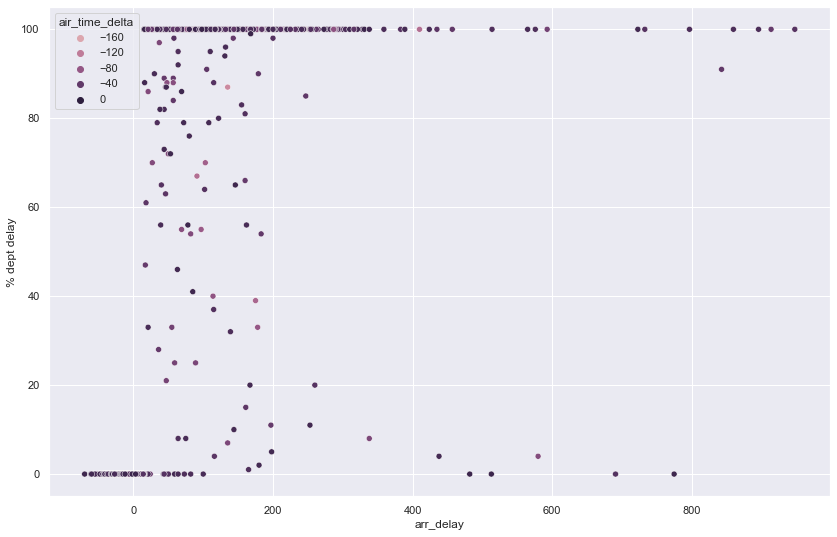

In [125]:
sns.scatterplot(data=delay_result, x="arr_delay", y="% dept delay", hue = 'air_time_delta')

In [116]:
#pink means they were way slower than expected, looks like they never made up time in the air.
#the only delay not incl in dept delay is weather delay

In [126]:
delay_result.describe()

,arr_delay,departure_delay,% dept delay,air_time_delta
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.466500,12.105500,17.958900,-24.731800
std,49.373696,42.895086,38.226694,12.265493
min,-70.000000,0.000000,0.000000,-198.000000
25%,-15.000000,0.000000,-0.000000,-29.000000
50%,-6.000000,0.000000,0.000000,-22.000000
75%,7.000000,0.000000,0.000000,-17.000000
max,948.000000,948.000000,100.000000,0.000000


In [132]:
#now count the number of 100% dept delays
delay_result[['% dept delay', 'departure_delay']].groupby(by = ['% dept delay']).count().sort_values(by = ['departure_delay'], ascending = False).head(3)

,departure_delay
% dept delay,
0.0,8169
100.0,1746
88.0,4


In [135]:
#Are airlines able to lower the delay during the flights? looks like no. 
#The mean air_time_delta for flights that are exclusively caused by departure delays is -32 mins
delay_result[delay_result['% dept delay'] == 100].describe()

,arr_delay,departure_delay,% dept delay,air_time_delta
count,1746.000000,1746.000000,1746.0,1746.000000
mean,66.309278,66.309278,100.0,-31.879725
std,80.063796,80.063796,0.0,18.872650
min,15.000000,15.000000,100.0,-198.000000
25%,24.000000,24.000000,100.0,-39.000000
50%,40.000000,40.000000,100.0,-26.000000
75%,80.000000,80.000000,100.0,-20.000000
max,948.000000,948.000000,100.0,-5.000000


#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
#sort by last two characters of the location to sort by state
#sort arrivals and dest then add them up?

In [138]:
flights_tsk6 = flights[['fl_date','origin_city_name','dest_city_name', 'cancelled', 'diverted','flights']]

In [139]:
flights_tsk6.head()

,fl_date,origin_city_name,dest_city_name,cancelled,diverted,flights
0,2018-07-10,"San Antonio, TX","Nashville, TN",0.0,0.0,1.0
1,2019-10-10,"Chicago, IL","Orlando, FL",0.0,0.0,1.0
2,2019-07-18,"Lawton/Fort Sill, OK","Dallas/Fort Worth, TX",0.0,0.0,1.0
3,2018-11-25,"Savannah, GA","Chicago, IL",1.0,0.0,1.0
4,2018-10-24,"Detroit, MI","Santa Ana, CA",0.0,0.0,1.0


In [140]:
flights_tsk6['States_orig'] = flights_tsk6['origin_city_name'].str.slice(-2)
flights_tsk6['States_dest'] = flights_tsk6['dest_city_name'].str.slice(-2)           

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\4246054966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_tsk6['States_orig'] = flights_tsk6['origin_city_name'].str.slice(-2)
C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\4246054966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_tsk6['States_dest'] = flights_tsk6['dest_city_name'].str.slice(-2)


In [143]:
flights_tsk6.shape

(10000, 8)

In [144]:
#drop all cancelled flights
flights_tsk6 = flights_tsk6[flights_tsk6.cancelled != 1]

In [145]:
flights_tsk6.shape

(9842, 8)

In [146]:
flights_tsk6.head()

,fl_date,origin_city_name,dest_city_name,cancelled,diverted,flights,States_orig,States_dest
0,2018-07-10,"San Antonio, TX","Nashville, TN",0.0,0.0,1.0,TX,TN
1,2019-10-10,"Chicago, IL","Orlando, FL",0.0,0.0,1.0,IL,FL
2,2019-07-18,"Lawton/Fort Sill, OK","Dallas/Fort Worth, TX",0.0,0.0,1.0,OK,TX
4,2018-10-24,"Detroit, MI","Santa Ana, CA",0.0,0.0,1.0,MI,CA
5,2019-06-08,"Richmond, VA","Dallas/Fort Worth, TX",0.0,0.0,1.0,VA,TX


In [152]:
#count all orig states
orig_count = flights_tsk6.groupby(by = ['States_orig']).agg(orig_count = ('States_orig', 'count'))
dest_count = flights_tsk6.groupby(by = ['States_dest']).agg(dest_count = ('States_dest', 'count'))

In [183]:
#merge them
state_count = pd.concat([orig_count, dest_count], axis=1, join='outer')

In [184]:
state_count.shape

(53, 2)

In [185]:
orig_count.shape, dest_count.shape

((53, 1), (53, 1))

In [186]:
state_count['sum'] = state_count['orig_count'] +state_count['dest_count']

In [187]:
state_count.head()

,orig_count,dest_count,sum
AK,51,46,97
AL,50,59,109
AR,43,32,75
AZ,224,268,492
CA,1098,1036,2134


In [188]:
state_count['sum'].sum()

19684

In [189]:
state_count['% total flights'] = round(state_count['sum']/state_count['sum'].sum()*100, 2)

In [190]:
state_count = state_count.sort_values(by = ['sum'], ascending = False).reset_index()

In [195]:
state_count.rename(columns={"index": "state"}, inplace = True)

In [196]:
state_count['% cumsum'] = state_count['% total flights'].cumsum()

In [197]:
state_count.head(8)

,state,orig_count,dest_count,sum,% total flights,% cumsum
0,CA,1098,1036,2134,10.84,10.84
1,TX,948,934,1882,9.56,20.40
2,FL,702,700,1402,7.12,27.52
3,IL,622,636,1258,6.39,33.91
4,GA,539,496,1035,5.26,39.17
5,NY,458,526,984,5.00,44.17
6,NC,431,435,866,4.40,48.57
7,CO,446,403,849,4.31,52.88


In [ ]:
#for our 10 000 dataset, 8 states cover 50% of air traffic.

<AxesSubplot:xlabel='state', ylabel='% total flights'>

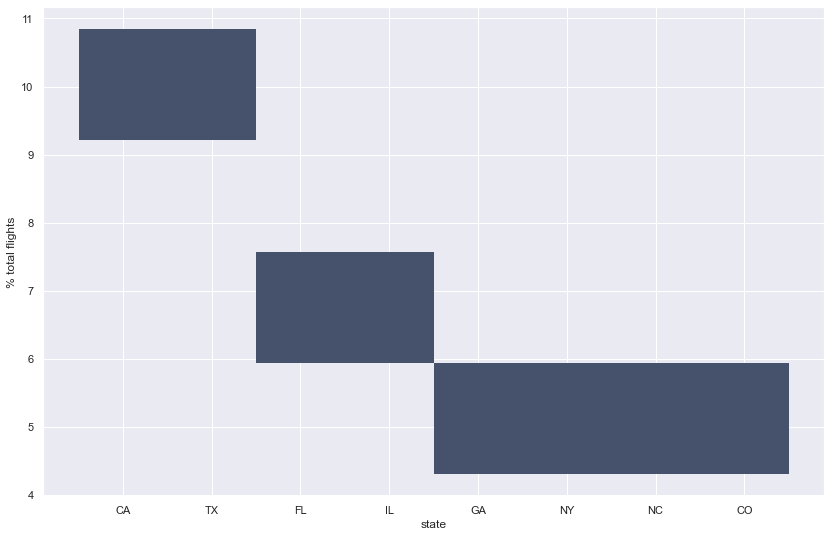

In [204]:
sns.histplot(data=state_count.head(8), x="state", y = "% total flights")

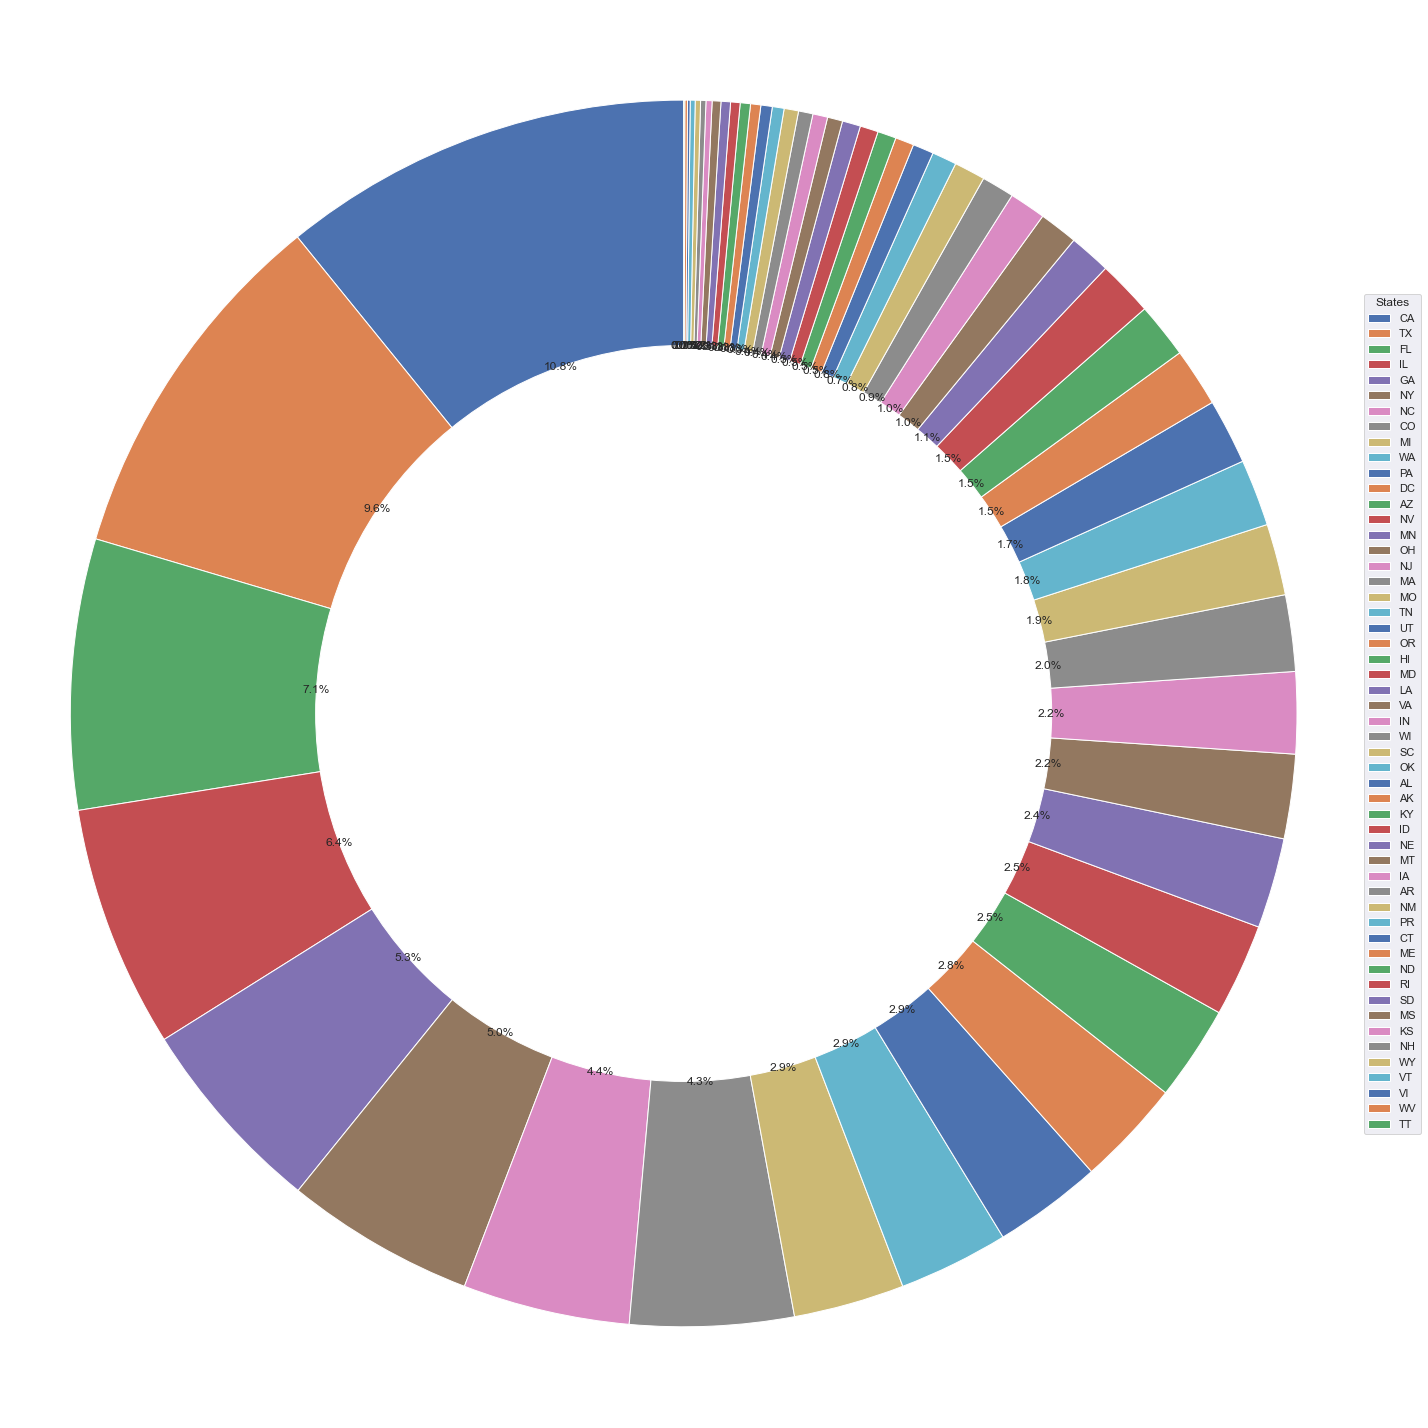

In [209]:
import matplotlib.pyplot as plt
labels = state_count['state']
sizes = state_count["% total flights"]

fig1, ax1 = plt.subplots(figsize=(20, 20))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax1.axis('equal')         # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [ ]:
#create speed feature (dist/air time, miles/hr) then compare speed vs departure delay

In [ ]:
#from task 5 I think the answer is already proven to be no.

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

American Airlines defines:
* short-/medium-haul flights as being less than 3,000 mi (2,600 nmi; 4,800 km) and 
* long-haul as either being more than 3,000 mi (2,600 nmi; 4,800 km) or being the New York–Los Angeles and New York–San Francisco routes.[8]
    
United Airlines defines:
* short-haul flights as being less than 700 mi (610 nmi; 1,100 km)[9]
* long-haul flights as being greater than 3,000 mi (2,600 nmi; 4,800 km).[10]
    
https://en.wikipedia.org/wiki/Flight_length

In [46]:
tsk8_flts = flights[['distance','crs_dep_time']]
tsk8_flts.head()

,distance,crs_dep_time
0,822.0,705
1,1005.0,800
2,140.0,1034
3,773.0,2200
4,1960.0,841


In [47]:
#define lengths: short = 700, med = 3000, long is else
tsk8_flts['time_length_categ'] = 'long'    #start with setting all to long
tsk8_flts.loc[(tsk8_flts['distance'] < 701), 'time_length_categ'] = 'short'
tsk8_flts.loc[(tsk8_flts['distance'] > 700) & (tsk8_flts['distance'] < 3001), 'time_length_categ'] = 'medium'

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\2503008951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsk8_flts['time_length_categ'] = 'long'    #start with setting all to long


In [48]:
#check
tsk8_flts[['distance','time_length_categ']].head()

,distance,time_length_categ
0,822.0,medium
1,1005.0,medium
2,140.0,short
3,773.0,medium
4,1960.0,medium


In [49]:
tsk8_flts[['crs_dep_time','time_length_categ']].groupby(by = 'time_length_categ').count()

,crs_dep_time
time_length_categ,
long,8
medium,4259
short,5733


In [50]:
#let's investigate the 8 long flights
tsk8_flts[tsk8_flts['time_length_categ'] == 'long']['crs_dep_time']

833     1000
2202    2050
2874    1000
3821    2009
4820    1644
7101     935
9345    1625
9620     845
Name: crs_dep_time, dtype: int64

In [51]:
#create new hr col to group
tsk8_flts['hr'] = [dt.time(hour=x//100).strftime("%H:%M") for x in tsk8_flts['crs_dep_time']]

C:\Users\3_hal\AppData\Local\Temp\ipykernel_15016\2066133117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsk8_flts['hr'] = [dt.time(hour=x//100).strftime("%H:%M") for x in tsk8_flts['crs_dep_time']]


In [52]:
tsk8_flts.head()

,distance,crs_dep_time,time_length_categ,hr
0,822.0,705,medium,07:00
1,1005.0,800,medium,08:00
2,140.0,1034,short,10:00
3,773.0,2200,medium,22:00
4,1960.0,841,medium,08:00


In [56]:
#let's group by category and hr and count the frequency
tsk8_flts_plt = tsk8_flts[['hr','time_length_categ']].groupby(by = ['time_length_categ', 'hr']).size()    

#tried count(), but didn't give me what I wanted. size() and .value_counts() same same

In [58]:
tsk8_flts_plt

time_length_categ  hr   
long               08:00      1
                   09:00      1
                   10:00      2
                   16:00      2
                   20:00      2
medium             00:00     29
                   01:00      5
                   02:00      3
                   03:00      1
                   05:00     90
                   06:00    306
                   07:00    335
                   08:00    327
                   09:00    247
                   10:00    259
                   11:00    303
                   12:00    264
                   13:00    219
                   14:00    233
                   15:00    221
                   16:00    230
                   17:00    256
                   18:00    243
                   19:00    241
                   20:00    188
                   21:00    131
                   22:00     71
                   23:00     57
short              01:00      1
                   05:00    139
               

In [59]:
#take category and hr out of the index and name the count column. sort by hr so we can plot nicely
tsk8_flts_plt = tsk8_flts_plt.reset_index().rename({0: 'hr_count'}, axis = 1).sort_values('hr')

<AxesSubplot:xlabel='hr', ylabel='hr_count'>

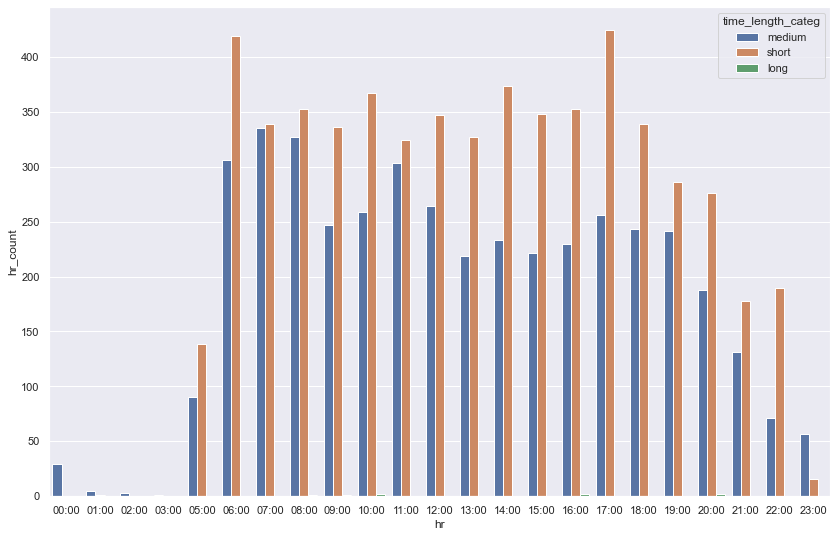

In [60]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})
sns.barplot(data=tsk8_flts_plt, x='hr', y='hr_count', hue='time_length_categ')

In [75]:
#returns the index of the largest hour for each category (2, 11, 41) - how to print those hrs??
tsk8_flts_plt.groupby(by = ['time_length_categ'])['hr_count'].nlargest(1, keep = 'all')

time_length_categ    
long               2       2
                   3       2
                   4       2
medium             11    335
short              41    424
Name: hr_count, dtype: int64

In [99]:
df1 = tsk8_flts_plt.groupby(by = ['time_length_categ', 'hr'], as_index = False).value_counts()
df1.sort_values(by = ['hr_count'], ascending = False).groupby(by = 'time_length_categ').head(1).drop('count', axis = 1)

,time_length_categ,hr,hr_count
41,short,17:00,424
11,medium,07:00,335
4,long,20:00,2


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?